Notebook realizzato da :  Agostino Fontana fontana.agostino@gmail.com cell.: 320 27 21 032 

L'obiettivo del progetto è quello di effettuare un analisi sulle series fornite dal provider  World Bank disponibile attraverso la piattaforma DBNomics. 




Note per l'utilizzatore :  qualora nel proprio ambiente non fosserò già installati il client DBNOMICS e librerie è neccessario eseguire le celle corrispondenti all'interno del notebook :
- Client dbnomics 
- Libreria requests
- Libreria pandas 
- Libreria matplotlib

In [1]:
pip install dbnomics


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


si procede all'importazione di tutte le funzioni contenute nel MODULO_AGOSTINO_FONTANA 


In [4]:
from Modulo_Agostino_Fontana.client import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


richiamo attraverso il metodo request il dataset, 
per impostare l'url corretto utilizzo lo Swagger fornito da DBNomics :  https://api.db.nomics.world/v22/apidocs#/  dal quale si effettua il setting della chiamata 

In [5]:
df1= create_dataframe_by_calling_api()

{'_meta': {'args': {'limit': 125, 'offset': 0}, 'version': '22.1.15'}, 'datasets': {'docs': [{'code': 'commodity_prices', 'description': 'The World Bank’s Commodity Price historical data and forecasts are published quarterly, in January, April, July and October. The price forecasts go up to 2030.\nTopics: Agriculture & Rural Development', 'dimensions_codes_order': ['indicator', 'country'], 'dimensions_values_labels': {'country': {'1W': 'World'}, 'indicator': {'FALUMINUM': 'Aluminum, nominal, $/mt', 'FBANANA_US': 'Banana, US, nominal, $/kg', 'FBARLEY': 'Barley, nominal, $/mt', 'FBEEF': 'Beef, nominal, $/kg', 'FCHICKEN': 'Meat, chicken, nominal, $/kg', 'FCOAL_AUS': 'Coal, Australian, nominal, $/mt', 'FCOCOA': 'Cocoa, nominal, $/kg', 'FCOCONUT_OIL': 'Coconut oil, nominal, $/mt', 'FCOFFEE_ARABIC': 'Coffee, arabica, nominal, $/kg', 'FCOFFEE_ROBUS': 'Coffee, robusta, nominal, $/kg', 'FCOPPER': 'Copper, nominal, $/mt', 'FCOTTON_A_INDX': 'Cotton, nominal, $/kg', 'FCRUDE_PETRO': 'Crude oil, ave

ottenuto l'elenco di tutte le serie, i dati suggeriscono di scomporre la colonna Descrizione in almeno 3 colonne :  Descrizione della Serie, indicatore prezzo, unità di misura. 
Pertanto effettuo un split del dataframe, scomponendo la descrizione. L'obiettivo è ottenere una migliore visibilità del dataframe ed un ordinamento del Dataframe per "indicizzazione dei prezzi, unità di misura dei prezzi e descrizione. 


In [6]:
df2=split_dataframe_by_description(df1)

    index value Unit of measure              Description            Code
0       nominal            $/mt                 Aluminum       FALUMINUM
1       nominal            $/kg               Banana, US      FBANANA_US
2       nominal            $/mt                   Barley         FBARLEY
3       nominal            $/kg                     Beef           FBEEF
4       nominal            $/kg            Meat, chicken        FCHICKEN
..          ...             ...                      ...             ...
120        real            $/mt  Tobacco, US import u.v.      KFTOBAC_US
121        real            $/mt                      TSP           KFTSP
122        real            $/mt                     Urea  KFUREA_EE_BULK
123        real            $/mt            Wheat, US HRW  KFWHEAT_US_HRW
124        real            $/mt                     Zinc          KFZINC

[125 rows x 4 columns]


nella cella successiva l'operatore può effettuare un filtro per keyword sulla descrizione, in tal modo nella successiva cella potrà scegliere il numero di series da analizzare ed i corrispondenti indici relativi. 

In [8]:
df_filtered=filter_by_keyword(df2)

    index value Unit of measure                          Description  \
37     2010=100            None                            MUV index   
17        index        2010=100                 Agriculture, nominal   
80        index        2010=100                    Agriculture, real   
18        index        2010=100  Base Metals (ex. iron ore), nominal   
81        index        2010=100     Base Metals (ex. iron ore), real   
..          ...             ...                                  ...   
123        real            $/mt                        Wheat, US HRW   
124        real            $/mt                                 Zinc   
77         real       $/troy oz                                 Gold   
107        real       $/troy oz                             Platinum   
113        real       $/troy oz                               Silver   

               Code  
37             FMUV  
17    FIAGRICULTURE  
80   KFIAGRICULTURE  
18        FIBASEMET  
81       KFIBASEMET  
.. 

Nella successiva iterazione si estraggono i codici relativi alle series da analizzare, necessari a rifare l'interrogazione al Dataset ed ottenere il nuovo Dataframe di lavoro. Pertanto IMPORTANTE : definire prima il numero delle serie da osservare, e poi successivamente inserire il corrispondente numero di riga. esempio : 
3 per le serie
101
100
102 
per il numero del codice

In [9]:
codes=extract_codes_to_analyze(df_filtered)

Hai inserito un valore non valido o il codice non è presente nel DataFrame.
7     FCOCONUT_OIL
16      FGRNUT_OIL
43       FPALM_OIL
54    FSOYBEAN_OIL
Name: Code, dtype: object


L'array, series code, ottenuta precedentemente è necessaria per rieseguire l'interrogazione al provider ed ottenere il nuovo Dataframe da analizzare. 


In [10]:
df_work=create_dataframe_to_analyze(codes)

      Coconut oil, nominal, $/mt – World  \
1960                          312.333333   
1961                          253.416667   
1962                          251.216667   
1963                          286.333333   
1964                          296.475000   
...                                  ...   
2026                         1461.518423   
2027                         1445.889919   
2028                         1430.428535   
2029                         1415.132484   
2030                         1400.000000   

      Groundnut oil, nominal, $/mt – World  Palm oil, nominal, $/mt – World  \
1960                            327.000000                       224.416667   
1961                            330.250000                       228.416667   
1962                            274.340000                       216.235833   
1963                            268.503333                       222.393333   
1964                            315.375833                       239.452500 

il dataframe ottenuto verrà adesso salvato all'interno della cartella Out del progetto

In [11]:
save_dataframe_to_csv(df_work)

il file DF_WORK.csv è stato salvato all'interno della cartella 'OUT' dello spazio di lavoro


nella cella successiva è possibile cambiare il percorso dove salvare il file

In [12]:
choosePath(df_work)

Hai inserito un percorso errato, riprova a lanciare il metodo o utilizzare il percorso di default visualizzato di seguito

Il file sarà memorizzato nel seguente percorso:
/Users/agostinofontana/Library/CloudStorage/GoogleDrive-fontana.agostino@gmail.com/Il mio Drive/Master_BigData_Unipa /01_Pyton/Agostino_Fontana


'/Users/agostinofontana/Library/CloudStorage/GoogleDrive-fontana.agostino@gmail.com/Il mio Drive/Master_BigData_Unipa /01_Pyton/Agostino_Fontana'

effettuo analisi sui dati ottenuti, 

In [13]:
analyze_dataframe(df_work)

       Coconut oil, nominal, $/mt – World  \
count                           71.000000   
mean                           800.337545   
std                            459.763330   
min                            234.060000   
25%                            419.750000   
50%                            656.833333   
75%                           1189.291667   
max                           1730.083333   

       Groundnut oil, nominal, $/mt – World  Palm oil, nominal, $/mt – World  \
count                             71.000000                        71.000000   
mean                            1013.631043                       543.894632   
std                              515.729205                       242.853725   
min                              268.503333                       168.830833   
25%                              600.125000                       340.791667   
50%                              963.666667                       528.416667   
75%                             15

eseguo il grafico  delle series estratte 

Il grafico è stato salvato come 'grafico.png' nella cartella 'OUT'


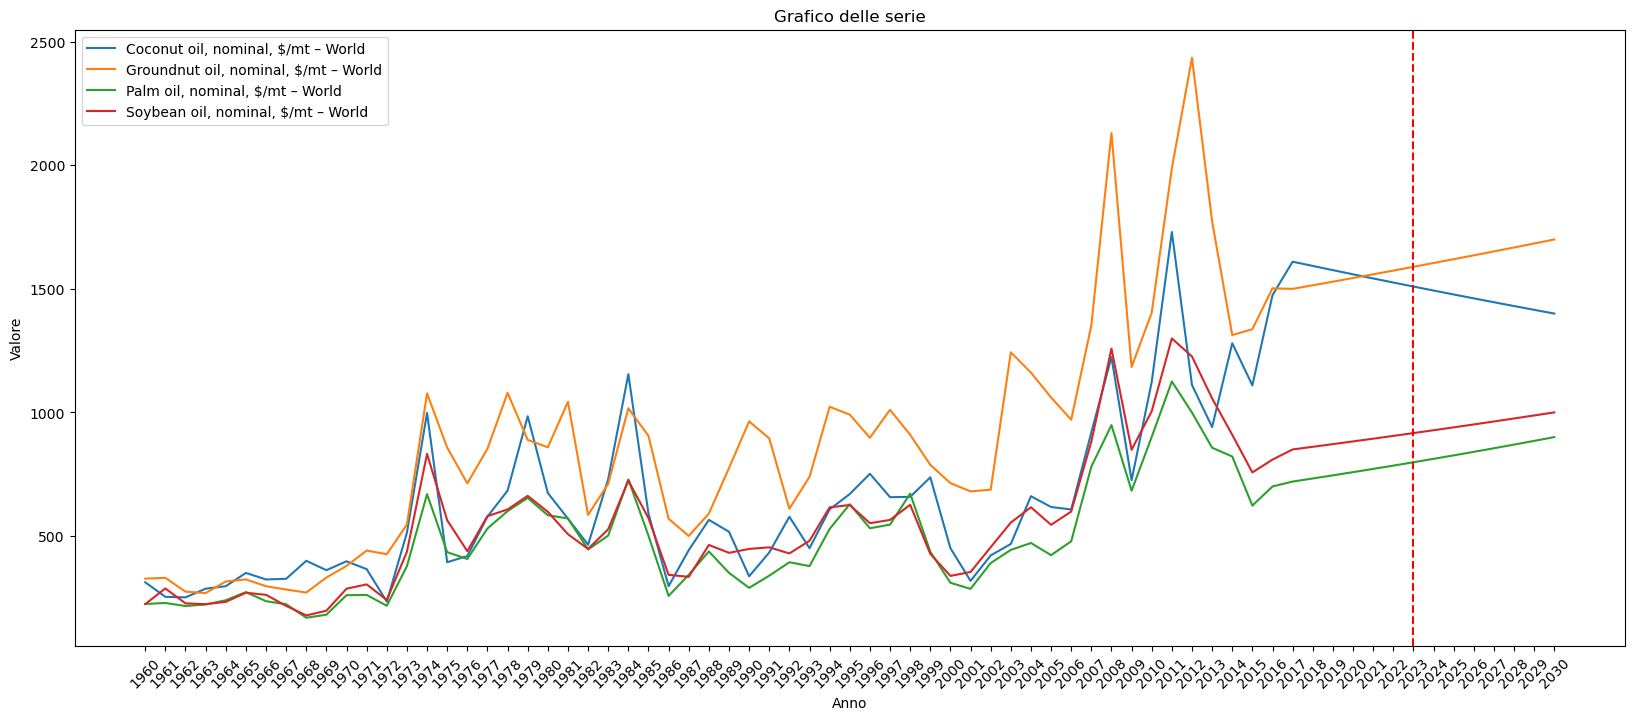

In [14]:
plot_and_save_df(df_work)

Il grafico è stato salvato come 'grafico_describe.png' nella cartella 'OUT'


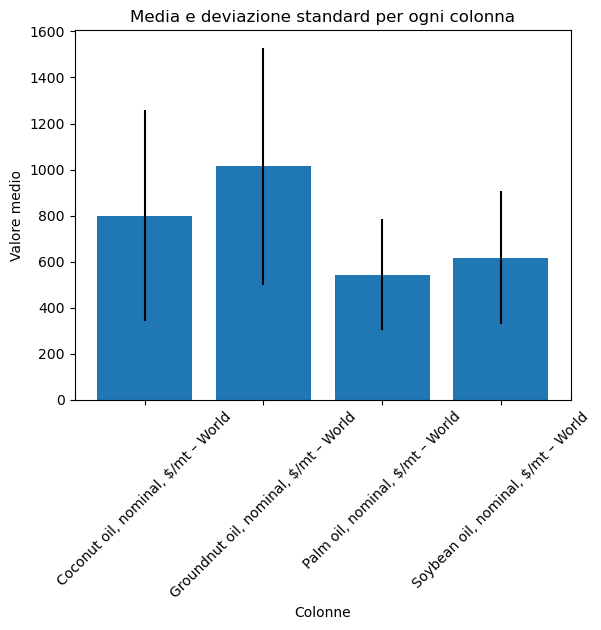

In [15]:
plot_and_save_describe(df_work)

Il grafico è stato salvato come 'grafico_correlazione.png' nella cartella 'OUT'


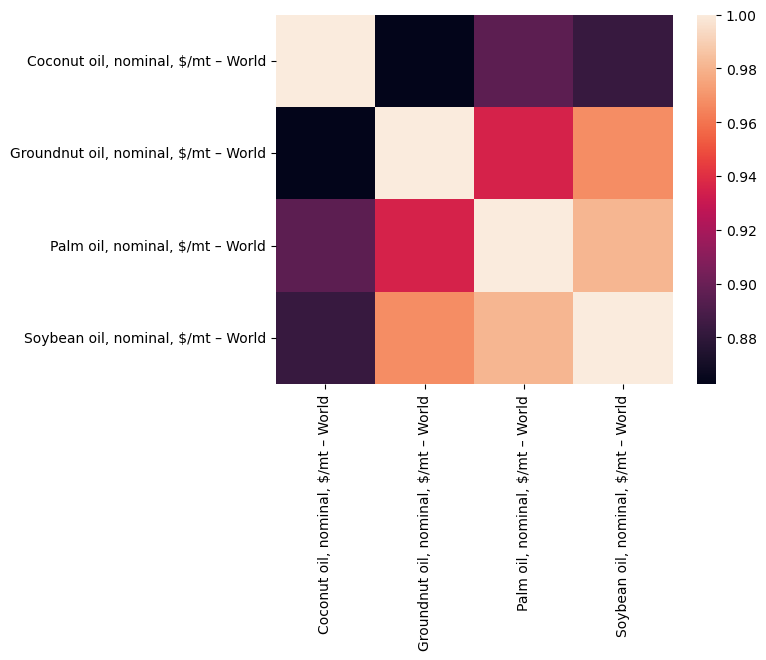

In [16]:
plot_and_save_correlation(df_work)